In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
path = Path('C:/Users/user/.fastai/data/planet')
path

WindowsPath('C:/Users/user/.fastai/data/planet')

In [ ]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze forest
1,train_1,agriculture clear forest water
2,train_2,clear forest
3,train_3,clear forest
4,train_4,agriculture clear habitation forest road


In [ ]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [ ]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [ ]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

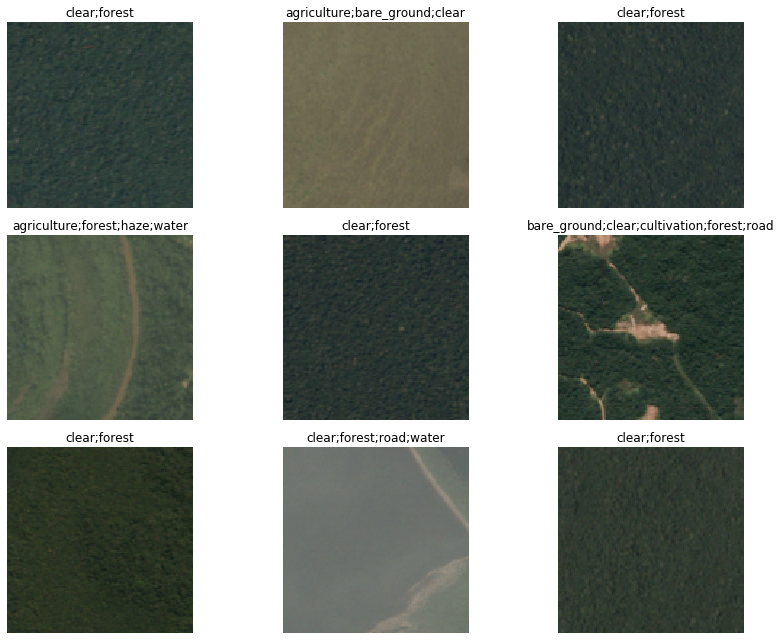

In [ ]:
data.show_batch(rows=3, figsize=(12,9))

In [ ]:
arch = models.resnet50

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


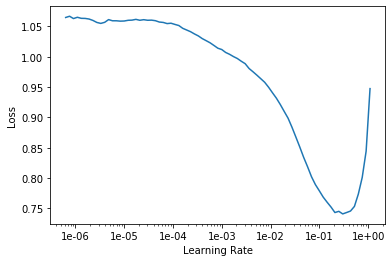

In [ ]:
learn.recorder.plot()

In [ ]:
lr = 0.01

In [ ]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.138134,0.114328,0.946597,0.899966,37:55
1,0.113636,0.100378,0.946692,0.907398,04:29
2,0.104689,0.093619,0.954067,0.917743,04:31
3,0.094318,0.088131,0.957258,0.923803,04:27
4,0.091886,0.086793,0.956734,0.924542,04:25


In [ ]:
learn.save('stage-1-rn50')

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


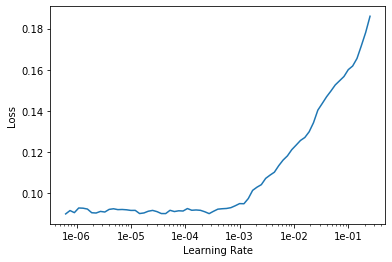

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.097647,0.092566,0.956030,0.919376,08:33
1,0.097010,0.091223,0.953377,0.922148,06:03
2,0.090714,0.084978,0.957403,0.928034,07:36
3,0.084875,0.083140,0.957824,0.928125,05:48
4,0.082052,0.082444,0.958769,0.928479,05:41


In [ ]:
learn.save('stage-2-rn50')

In [ ]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [ ]:
learn.load('stage-2-rn50');

In [ ]:
learn.freeze()